# Basics in Data Visualisation

This notebook aims to provide an basic overview of important methods used for data visualisation in a data analytical context. The first two chapters present different methods within `matplotlib` and `seaborn`. In chapter three and four, we demonstrate two additional libraries, which extend the pool of basic modules. For example, we show how `bokeh` can be used to build interactive plots.

The content of the notebook can be summarised as follows:

1. [MatplotLib](#plt)<br/>
    1.1 [A simple plot of a graph](#plt1)<br/>
    1.2 [A simple empirical histogram](#plt2)<br/>
    1.3 [Multiple plots](#plt3)<br/>
    1.4 [Scatter plots](#plt4)<br/>
    1.5 [3D plots](#plt5)<br/>
2. [Seaborn](#sns)<br/>
    2.1 [Matplotlib vs. Seaborn](#sns1)<br/>
    2.2 [Seaborn and dataframes](#sns2)<br/>
    2.3 [Visualising time series](#sns3)<br/>
    2.4 [Relation plots](#sns4)<br/>
    2.5 [Empirical Histograms and Kernel Density Estimates (KDEs)](#sns5)<br/>
    2.6 [Visualising correlations](#sns6)<br/>
    2.7 [Visualising data in 2D](#sns7)<br/>
3. [Bokeh](#bokeh)
4. [WordCloud](#wc)

In [7]:
import numpy as np
import pandas as pd

<hr style="border:1.5px solid gray"> </hr>

## 5.1. Matplotlib

<a id='plt'></a>

Matploblib can be seen as the cornerstone an most used environment for 2-dimensional plotting in Python and its numerical mathematics extension NumPy. In particular the procedural pyplot interface provides a MATLAB-like plotting framework. Therefore, the majority of plotting commands in pyplot have Matlab analogs with similar arguments.


More information can be found under

* https://matplotlib.org/index.html 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html.

In [21]:
import matplotlib.pyplot as plt

-----

### A simple plot of a graph:

<a id='plt1'></a>

For an exemplary function plot, we define the function $f: \mathbb{R}\rightarrow\mathbb{R}^+,\; f:x\mapsto e^{-x}$. 

In [3]:
def f(x): 
    return np.exp(-x)

To illustrate the function, we generate a grid using the numpy method `np.linspace()`. To generate the plot the function `plt.plot()` takes the x-values and y-values as necessary arguments. Using the methods `plt.title()`, `plt.xlabel()` and `plt.ylabel()` we can add additional - but very important - information to the figure. 

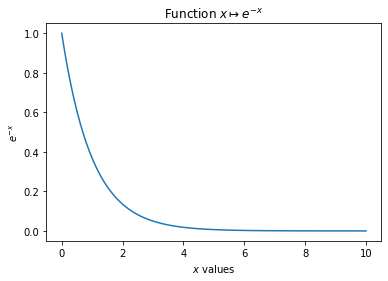

In [4]:
aa = np.linspace(0, 10, 100)
bb = f(aa)
plt.plot(aa, bb)
plt.title('Function $x \mapsto e^{-x}$')
plt.xlabel("$x$ values")
plt.ylabel('$e^{-x}$')
plt.show()

-----

### A simple empirical histogram:

<a id='plt2'></a>

To analyze or model data it is often a good approach to try to understand the underlying distribution. A visualization of the (empirical) distribution can often provide early answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Etc.

Perhaps the most common approach to visualizing a distribution is the histogram. A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar.

Using the method `plt.hist()`, it is possible to plot an empirical histogram of a given random vector. In addition, it is possible to set the number of bins. By default the bins of the histogram show the absolute amount of observations. However, one can use the `density` argument to observe the relative occurrence of the observation.

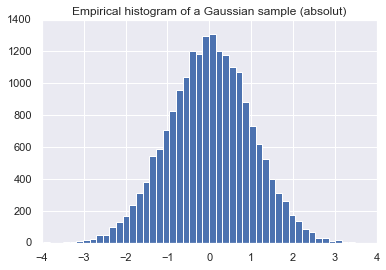

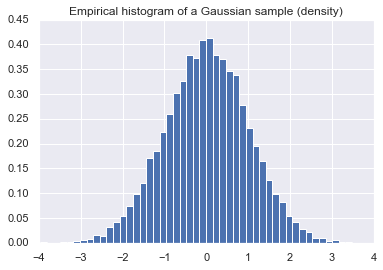

In [44]:
xx = np.random.normal(size=20000)

plt.hist(xx, bins=50)
plt.title('Empirical histogram of a Gaussian sample (absolut)')
plt.show()

plt.hist(xx, bins=50, density = True)
plt.title('Empirical histogram of a Gaussian sample (density)')
plt.show()

----

### Multiple plots (subplots):

<a id='plt3'></a>

The avoid creating two plots seperately as above, one can use `plt.subplots()` to generate a blank canvas for several plots. In particular, the first argument `nrows` of the function defines the number of rows and the second `ncols`the number of columns. Moreover, it is possible to define the size of the graphic as shown in the next cell.

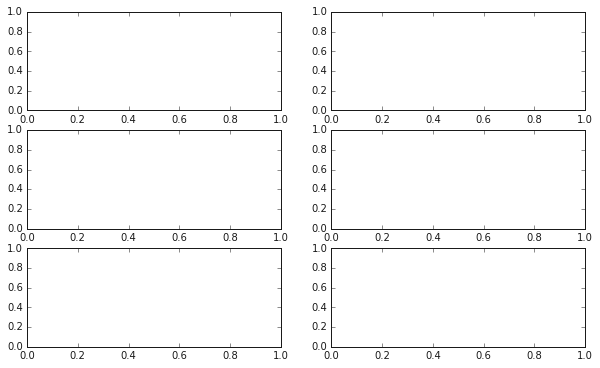

In [19]:
#This creates a blank canvas for 6 plots.
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(10, 6))
plt.show()

----

### Scatter plots:

<a id='plt4'></a>

Scatter plots are used to plot data points on the horizontal and vertical axis to visualise a possible dependence structure. To generate such a plot, one can use `plt.scatter()`. Using arguments like `color` or `marker` makes it possible to customize the plot.

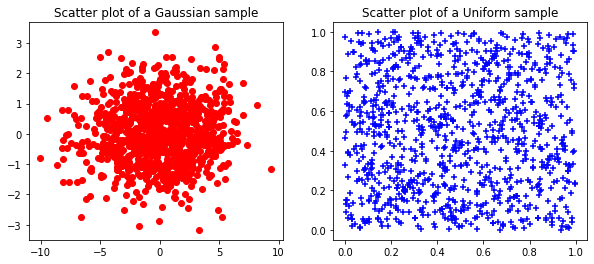

In [7]:
n = 1000
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#Accessing the first plot
plt.subplot(1, 2, 1)
aa = np.random.normal(0., 3., n)
bb = np.random.normal(0., 1., n)
plt.scatter(aa, bb, color='r')
plt.title('Scatter plot of a Gaussian sample')

#Accessing the second plot
plt.subplot(1, 2, 2)
aa = np.random.rand(n)
bb = np.random.rand(n)
plt.scatter(aa, bb, color='b', marker='+')
plt.title('Scatter plot of a Uniform sample')
plt.show()

-----

### 3D plots:

<a id='plt5'></a>

An Axes3D object is created just like any other axes using the `projection=‘3d’` keyword. Using the `numpy` method `np.meshgrid`, we create a 2-dimensional grid on the X-Y plane. To plot the Z points, we use `plot_surface()`

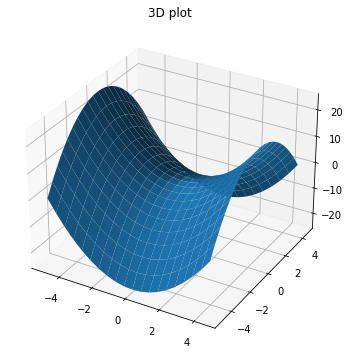

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
XX = np.arange(-5, 5, 0.5)
YY = np.arange(-5, 5, 0.5)
XX, YY = np.meshgrid(XX, YY)
ZZ = XX**2 - YY**2
surf = ax.plot_surface(XX, YY, ZZ)
ax.set_title('3D plot')
plt.show()

<hr style="border:1.5px solid gray"> </hr>

## 5.2. Seaborn

<a id='sns'></a>

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

More infos on https://seaborn.pydata.org/.

-----

### Matplotlib vs. Seaborn:
<a id='sns1'></a>

The following demonstrates the difference of the default `matplotlib` and `seaborn` design.

In [9]:
n, p = 100, 5
xx = np.linspace(0., 1., n)
yy = np.cumsum(np.random.randn(n, p), axis=0)

In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

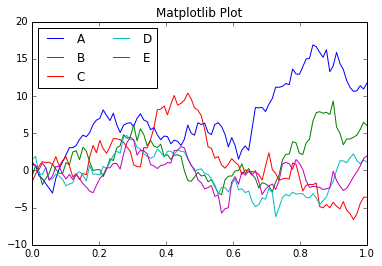

In [11]:
plt.plot(xx, yy)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.title("Matplotlib Plot")
plt.show()

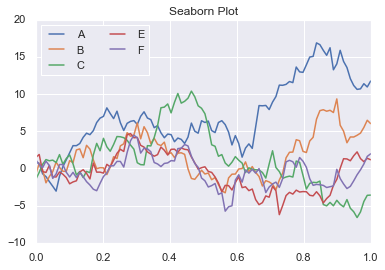

In [20]:
import seaborn as sns
# Sets the visual framework of Seaborn
sns.set()
# Same plotting code as above!
plt.plot(xx, yy)
plt.legend('ABCEF', ncol=2, loc='upper left')
plt.title("Seaborn Plot")
plt.show()

-----

### Seaborn and dataframes:
<a id='sns2'></a>

As already mentioned, the seaborn library easily integrates with the functionality of a Pandas `dataframe`. We illustrate this property using historical stock data accessed via `yahoo_finance`.

In [13]:
import yahoo_fin.stock_info as si
AAPL = si.get_data("AAPL")

In [14]:
AAPL.tail()

,open,high,low,close,adjclose,volume,ticker
2021-03-15,121.410004,124.000000,120.419998,123.989998,123.989998,92403800.0,AAPL
2021-03-16,125.699997,127.220001,124.720001,125.570000,125.570000,114740000.0,AAPL
2021-03-17,124.050003,125.860001,122.339996,124.760002,124.760002,111437500.0,AAPL
2021-03-18,122.879997,123.180000,120.320000,120.529999,120.529999,121229700.0,AAPL
2021-03-19,119.900002,121.430000,119.680000,119.989998,119.989998,185023200.0,AAPL


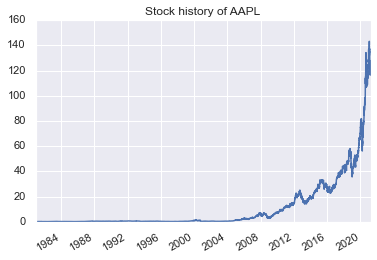

In [15]:
ax = AAPL['close'].plot(legend = False)
ax.set_title('Stock history of AAPL')
plt.show()

----

### Visualising time series
<a id='sns3'></a>

Since the historical stock data is clearly a timeseries, it is important to understand how one can handle the different date points of such a dataframe. In fact, Seaborn "understands" the x-lables in a date format ('YYYY-MM-DD'), so we can define plot areas using certain datepoints. This is illustrated by coloring three time periods, were the stock had a local peak by using the method `axvspan`.

In [92]:
AAPL2 = si.get_data("AAPL", start_date = "01/01/2012")
AAPL2 = AAPL2.dropna()

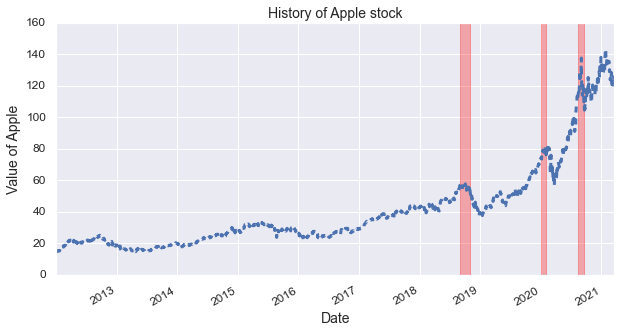

In [98]:
plt.style.use('seaborn-deep')
ax = AAPL2["open"].plot(figsize = (10, 5), fontsize=12, linewidth=3, linestyle='--')
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Value of Apple', fontsize = 14)
ax.set_title("History of Apple stock", fontsize = 14)
ax.axvspan('2018-09-01', '2018-11-01', color='red', alpha=0.3)
ax.axvspan('2020-01-01', '2020-02-01', color='red', alpha=0.3)
ax.axvspan('2020-08-15', '2020-09-15', color='red', alpha=0.3)
plt.show()

----

### Relation plots:
<a id='sns4'></a>

In the statistical analysis of a process it is often very important to understand how differents variables within a dataset relate to each other and how those relationships depend on other variables. Visualization tools can be a core component of this process because, when data are visualized properly, it could be possible to make first assumptions about dependencies, which can then be studied in more detail. A very useful tool provided by Seaborn is the method `relplot()`.

In [63]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The following cells demonstrates how components of the dataset can be highlighted in different ways - e.g. by `color`, `size`, `marker` - such that multiple relationships, trends etc. can be visualised at once.

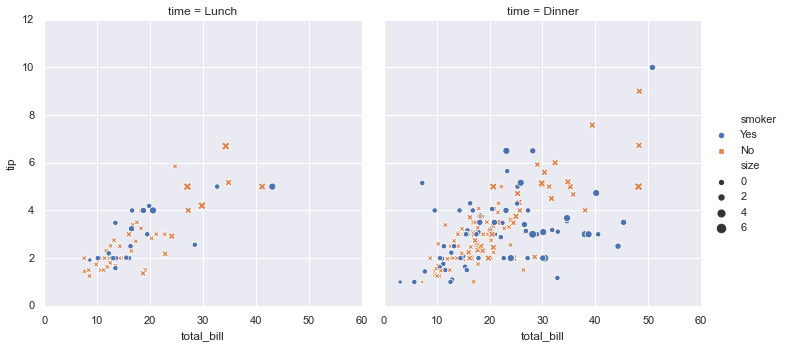

In [67]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time",hue="smoker", style="smoker", size="size")
plt.show()

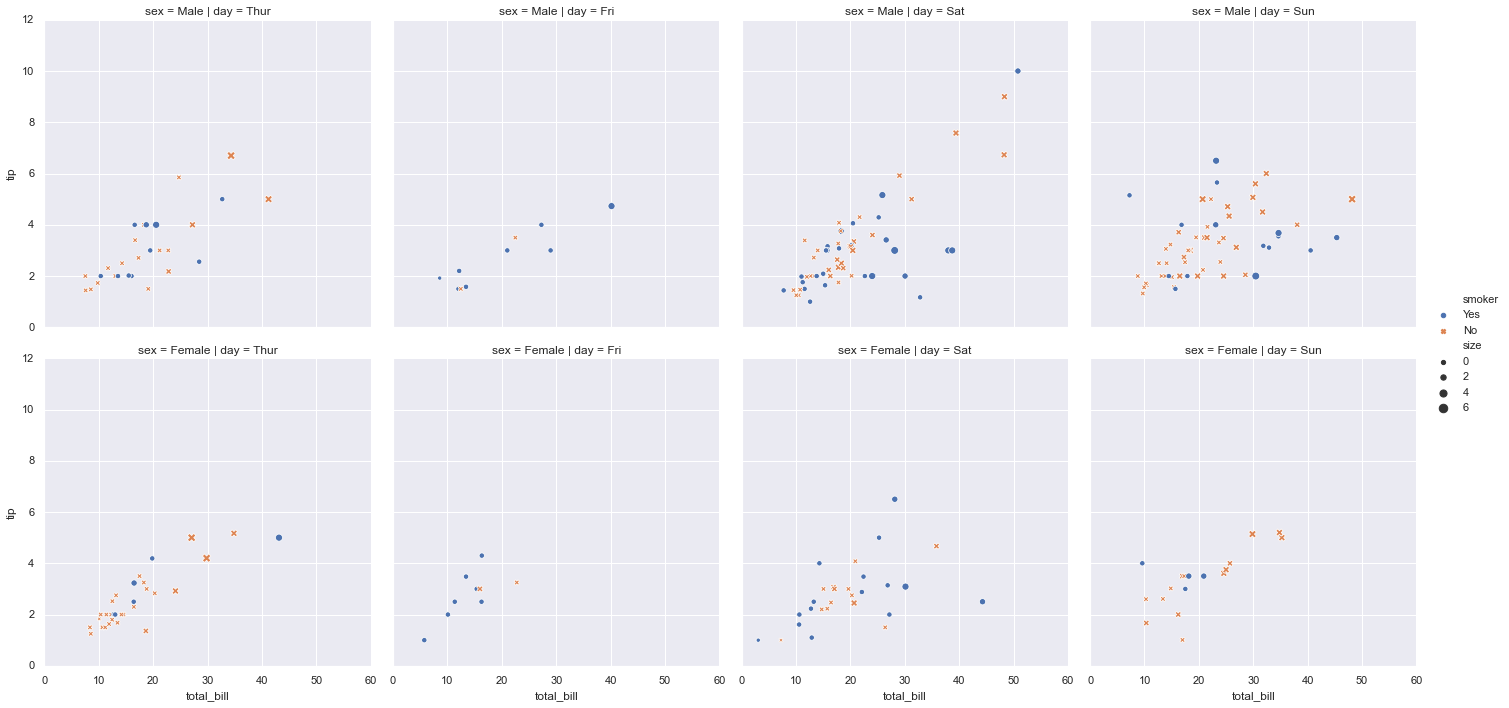

In [68]:
sns.relplot(data=tips, x="total_bill", y="tip", col="day", row="sex", hue="smoker", style="smoker", size="size")
plt.show()

In the prior plots, we used a scatter style to identify relationships. However, sometimes it makes more sense to use classical lineplot, especially when the underlying data is a timeseries as follows.

In [70]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


The following plots illustarte how an initial stimulus of a body part triggers a measurable reaction of the nervous system over time. Note at this point that we have several datapoints for a single x-value (probably because the data was produced in a study with several participants). In this case, the default behavior of Seaborn is to aggregate the multiple measurements at each x-value by additionally plotting a 95%-confidence interval.

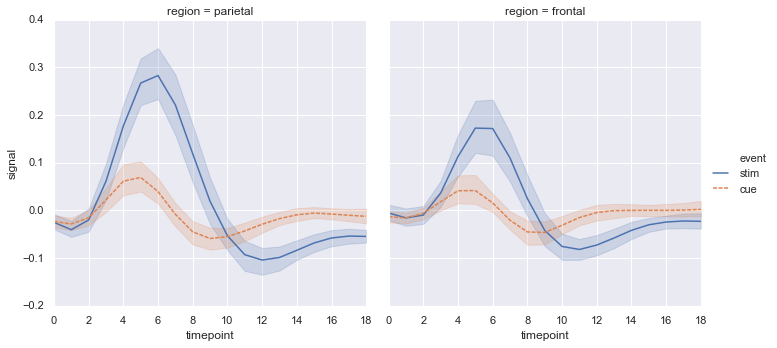

In [71]:
sns.relplot(data=fmri, x="timepoint", y="signal", col="region", hue="event", style="event", kind="line")
plt.show()

----

### Empirical Histograms and Kernel Density Estimates (KDEs):
<a id='sns5'></a>

As we have seen before, plotting histograms gives a first impression about the distribution of the underlying dataset. Based on the basic `matplotlib` functionaliy, `seaborn` adds new features like a kernel density estimate.

In [40]:
meanVector = [0., 0.]
covMatrix = [[5., 2.], [2., 2.]]
data = np.random.multivariate_normal(meanVector, covMatrix, size=10000)
data = pd.DataFrame(data, columns=['x', 'y'])

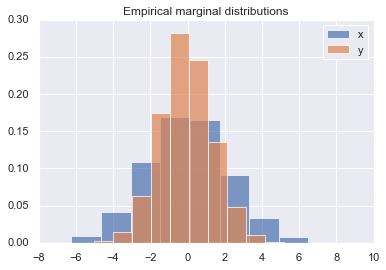

In [53]:
for col in 'xy':
    #The parameter alpha defines the opacity of the histgram bars
    plt.hist(data[col], density=True, alpha=0.7, label=col)
plt.legend(loc='best')
plt.title('Empirical marginal distributions')
plt.show()

Different from histograms which use discrete bins, a KDE plot smooths the observations with a Gaussian kernel (by default), producing a continuous density estimate. Some theory on this:

Let $(x_1, x_2,..., x_n)$ be independent and identically distributed samples drawn from some univariate distribution with an unknown density $f$ at any given point $x$. We are interested in estimating the shape of this function $f$. Its kernel density estimator is

$$
\hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^n \mathcal{K}\left(\frac{x-x_i}{h}\right)
$$


where $\mathcal{K}$ is the kernel — a non-negative function — and $h$ > 0 is a smoothing parameter called the bandwidth.

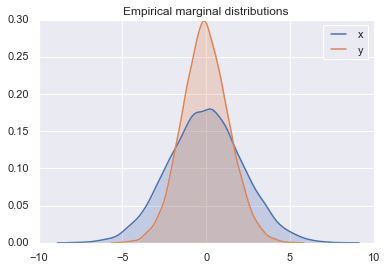

In [47]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")

The Seaborn method `distplot()` can be used to automatically plot the histogram and KDE of a given set of data samples.

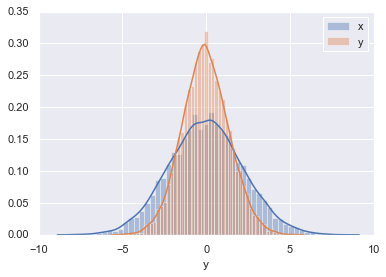

In [48]:
sns.distplot(data['x'], label='x')
sns.distplot(data['y'], label='y')
plt.legend(loc='best')
plt.show()

-----

### Visualising correlations
<a id='sns6'></a>

Coming back to the important task of analysing dependencies between different variables or samples, we now turn our attention to visualising (empirical) correlations. Again we use historical stock data, to see if we can make first guesses on the relationship of different stock behaviors.

In [21]:
tickers = ["aapl", "amzn", "ba", "BRK.A", "bac", "V", "baba", "pypl", "xom", "hal", "slb", "csco", "intc", "orcl", "ko", "cl", "pg", "wmt"]
goodtickers = []
df = pd.DataFrame()

for t in tickers:
    try:
        dfTicker = si.get_data(t)
        dfTicker = dfTicker['open']
        df = pd.concat([df, dfTicker], axis=1)
        goodtickers.append(t)
    except:
        print("Ticker ", t, " not available")

df = df.dropna()
df.columns = goodtickers
df.tail(1)

Ticker  BRK.A  not available


,aapl,amzn,ba,bac,V,baba,pypl,xom,hal,slb,csco,intc,orcl,ko,cl,pg,wmt
2021-03-19 00:00:00,119.900002,3029.22998,257.75,38.290001,219.119995,239.660004,239.630005,56.709999,22.030001,27.26,48.709999,63.18,66.790001,50.459999,76.099998,129.100006,130.130005


Using the Pandas method `corr()`, we can compute the empirical correlation matrix between the different stock time series.

In [22]:
corrmat = df.corr(method='pearson')
corrmat

,aapl,amzn,ba,bac,V,baba,pypl,xom,hal,slb,csco,intc,orcl,ko,cl,pg,wmt
aapl,1.000000,0.946777,0.097051,0.530657,0.876867,0.872320,0.969613,-0.861408,-0.699037,-0.822571,0.506707,0.681502,0.833473,0.590548,0.591005,0.866987,0.915033
amzn,0.946777,1.000000,0.291771,0.622105,0.942249,0.922272,0.961596,-0.828641,-0.721972,-0.881485,0.699821,0.792524,0.880298,0.618747,0.482925,0.842940,0.945139
ba,0.097051,0.291771,1.000000,0.802335,0.452588,0.406535,0.201253,0.099521,-0.059017,-0.254188,0.795991,0.582113,0.485389,0.499155,-0.198246,0.134405,0.322737
bac,0.530657,0.622105,0.802335,1.000000,0.722720,0.731468,0.580127,-0.273416,-0.221803,-0.487473,0.813102,0.796376,0.772997,0.605351,0.148984,0.467296,0.639870
V,0.876867,0.942249,0.452588,0.722720,1.000000,0.897503,0.902753,-0.767880,-0.780589,-0.919527,0.809986,0.879716,0.917766,0.795667,0.406180,0.884776,0.956614
baba,0.872320,0.922272,0.406535,0.731468,0.897503,1.000000,0.876475,-0.747385,-0.591364,-0.804086,0.681108,0.820074,0.890897,0.624343,0.486746,0.783761,0.906044
pypl,0.969613,0.961596,0.201253,0.580127,0.902753,0.876475,1.000000,-0.812499,-0.707874,-0.844674,0.615693,0.723224,0.882094,0.609715,0.560770,0.853386,0.925370
xom,-0.861408,-0.828641,0.099521,-0.273416,-0.767880,-0.747385,-0.812499,1.000000,0.841588,0.880641,-0.343310,-0.567382,-0.642601,-0.455054,-0.441870,-0.809966,-0.824423
hal,-0.699037,-0.721972,-0.059017,-0.221803,-0.780589,-0.591364,-0.707874,0.841588,1.000000,0.931658,-0.482776,-0.574698,-0.631554,-0.645136,-0.281201,-0.819703,-0.779572
slb,-0.822571,-0.881485,-0.254188,-0.487473,-0.919527,-0.804086,-0.844674,0.880641,0.931658,1.000000,-0.664816,-0.758730,-0.810555,-0.705910,-0.349673,-0.885567,-0.914757


Since such a matrix can be quite chaotic, if we are only interested in a first impression of dependencies, we can use the Seaborn method `heatmap()` to visualise the different values of the correlation matrix.

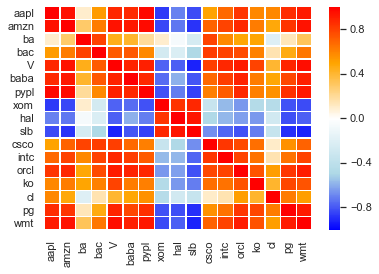

In [39]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['blue', 'lightblue', 'white', 'orange', 'red'])
sns.heatmap(corrmat, cmap=cmap, vmin=-1., vmax=1., linewidths=.5)
plt.show()

-----

### Visualising data in 2D:
<a id='sns7'></a>

Using the function `jointplot()`, it is possible to visualise the distributive properties of two datasets and their dependencies at once. 

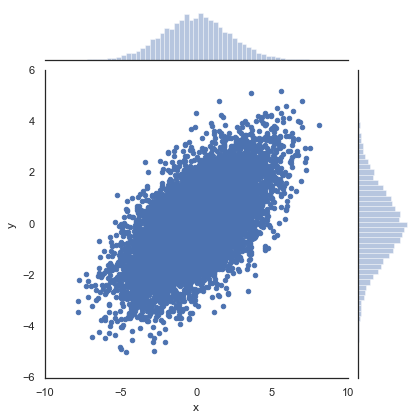

In [57]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data)

The argument `kind` makes it possible to plot the properties using different methods, like a KDE instead of histogram, or we can add an analysis feature like a linear regression.

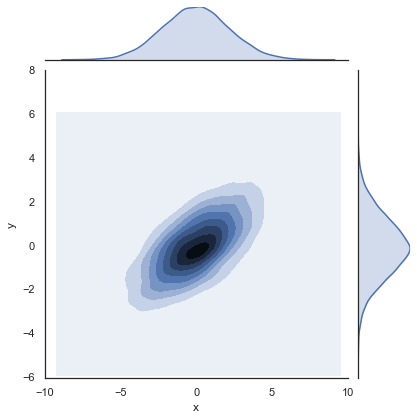

In [56]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde')

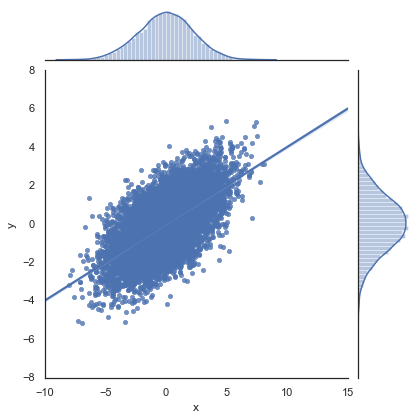

In [82]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='reg')

<hr style="border:1.5px solid gray"> </hr>

## 5.3. Bokeh

<a id='bokeh'></a>

Bokeh is a Python library for creating interactive visualizations for modern web browsers. However, it is also possible to create an interactive graphic within a Jupyter Notebook. For more information visit https://docs.bokeh.org/en/latest/index.html.

In [3]:
import bokeh.plotting
import bokeh.io

In [4]:
bokeh.io.output_notebook()

Loading BokehJS ...

While Bokeh offers quite a huge range of functionalities, we only present the use of widgets to interact with a simple plot of the general sine function given by 

$$
f(x) = a\cdot\sin(k\cdot x + w) + b,
$$

where $a$ is the parameter for the amplitude, $k$ for the wave frequency, $w$ for the phase and $b$ for the offset.

In [5]:
import bokeh.plotting.figure as bk_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook # enables plot interface in Jupyter notebook

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

First, we define the grid for both axes later used for the plot.

In [8]:
n = 2000
xx = np.linspace(-2.*np.pi, 2.*np.pi, n)
yy = np.sin(xx)
source = ColumnDataSource(data=dict(x=xx, y=yy))

In the next cell, we use the method `bk_figure()` the define the properties of the function plot. For example, using the argument `tools` allows us to setup a small toolbar next to the plot, which gives us some first interaction points with the graphic. 

In [9]:
plot = bk_figure(plot_height=400, plot_width=400, title="Nik's wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[np.min(xx), np.max(xx)], y_range=[np.min(yy), np.max(yy)])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

GlyphRenderer(id='1038', ...)

The most important part for the interaction are widgets. They can appear in different forms (e.g. sliders, dropdowns, textinputs). The argument `title` defines which parameter of the plot is changed by using the regarding widgets. Moreover, we need to define helping functions to update the ploted curve, when a widget is used by the user.

In [10]:
text = TextInput(title="title", value='Sin function')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)

In [11]:
def update_title(attrname, old, new):
    plot.title.text = text.value

def update_data(attrname, old, new):
    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    newyy = a*np.sin(k*xx + w) + b

    source.data = dict(x=xx, y=newyy)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)

Finally, we can setup and layout the interactive framework for the plot. In our case, it consists of the function plot itseld, the toolbar and the widgets.

In [12]:
# Set up layouts and add to document
inputs = widgetbox(text, offset, amplitude, phase, freq)
layout = row(plot, widgetbox(text, offset, amplitude, phase, freq))

def modify_doc(doc):
    doc.add_root(row(layout, width=800))
    doc.title = "Sliders"
    text.on_change('value', update_title)

handler = FunctionHandler(modify_doc)

In [13]:
show(Application(handler))

<hr style="border:1.5px solid gray"> </hr>

## 5.4. WordCloud

<a id='wc'></a>

Lastly, we show another funny way to visualise data using "word clouds" via the library `WordCloud`. In our case, the cloud is filled with the most used words in the titles of new articles about a certain keyword. To access the news articles we use the service of https://newsapi.org, where it is possible to get the content of a huge range of publications within a certain time window.

In [15]:
from wordcloud import WordCloud

To access the API, you need a personal key, which you can get for free from https://newsapi.org.

In [16]:
api = '8491cad2e39a4e5da5b92d24f1cb0eb2'
import requests
import pprint
url = 'https://newsapi.org/v2/everything?'

Next, you need to define the parameters for your API request. In this case, the parameter `'q'` defines the keyword to search for.

In [18]:
parameters = {
    'q': 'Musk', # query phrase
    'pageSize': 80,  # maximum is 100
    'apiKey': api, # your own API key
    'from': "2021-02-23"
}
json = requests.get(url, params=parameters).json()
pprint.pprint(json)

for i in json['articles']:
    print(i['title'])

{'articles': [{'author': 'https://www.engadget.com/about/editors/kris-holt',
               'content': 'Elon Musk\r\n'
                          ' has added another job title to his portfolio. As '
                          'if being CEO of multiple companies wasnt enough, '
                          'hes now Technoking of Tesla for some reason. '
                          'Meanwhile, the companys CFO, Zach Kirkhorn, … [+773 '
                          'chars]',
               'description': 'Watch out, Littlefinger: the automaker’s CFO is '
                              'now "Master of Coin."',
               'publishedAt': '2021-03-15T14:22:48Z',
               'source': {'id': 'engadget', 'name': 'Engadget'},
               'title': 'Elon Musk changes job title to “Technoking of Tesla”',
               'url': 'https://www.engadget.com/elon-musk-tesla-technoking-game-of-thrones-master-of-coin-142248051.html',
               'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/YetUM0YehAP

Lastly, we define a huge string containing the titles of all articles. This string will then be used to collect the words presented in the cloud.

In [19]:
allText = ''
for i in json['articles']:
    allText += str(i['title'] + ' ') 

wordcloud = WordCloud(max_font_size=40).generate(allText)

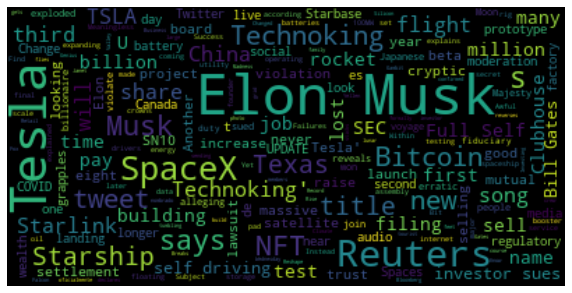

In [22]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()